## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check top 12 countries

In [2]:
df = pd.read_csv("../output/data_cleaning/1_data_exploration.csv")
df

,country,year,iso_code,population,gdp,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,cumulative_co2_including_luc,co2_including_luc
0,Argentina,1850,ARG,1088372.0,2.193400e+09,NaN,NaN,NaN,NaN,NaN,NaN,11.576,NaN,NaN,NaN,NaN,NaN
1,Argentina,1851,ARG,1115018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.035,NaN,NaN,NaN,NaN,NaN
2,Argentina,1852,ARG,1138141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.062,NaN,NaN,NaN,NaN,NaN
3,Argentina,1853,ARG,1157536.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.150,NaN,NaN,NaN,NaN,NaN
4,Argentina,1854,ARG,1177263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.177,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Vietnam,2018,VNM,94914328.0,6.815014e+11,1083.274,49.637,122.121,163.236,1.373,18.554,247.029,66.036,NaN,-94.486,12087.070,504.751
8423,Vietnam,2019,VNM,95776712.0,7.316531e+11,1202.636,56.538,191.443,211.240,1.453,18.906,248.054,73.449,NaN,-130.548,12676.914,589.843
8424,Vietnam,2020,VNM,96648680.0,7.526296e+11,1204.393,60.066,215.817,224.800,1.257,16.931,249.736,69.272,NaN,-138.543,13289.992,613.079
8425,Vietnam,2021,VNM,97468024.0,7.719120e+11,1208.554,62.071,211.893,227.044,0.995,13.757,252.922,63.838,NaN,-125.509,13895.467,605.475


1. Charts co2 by year by top 12 countries

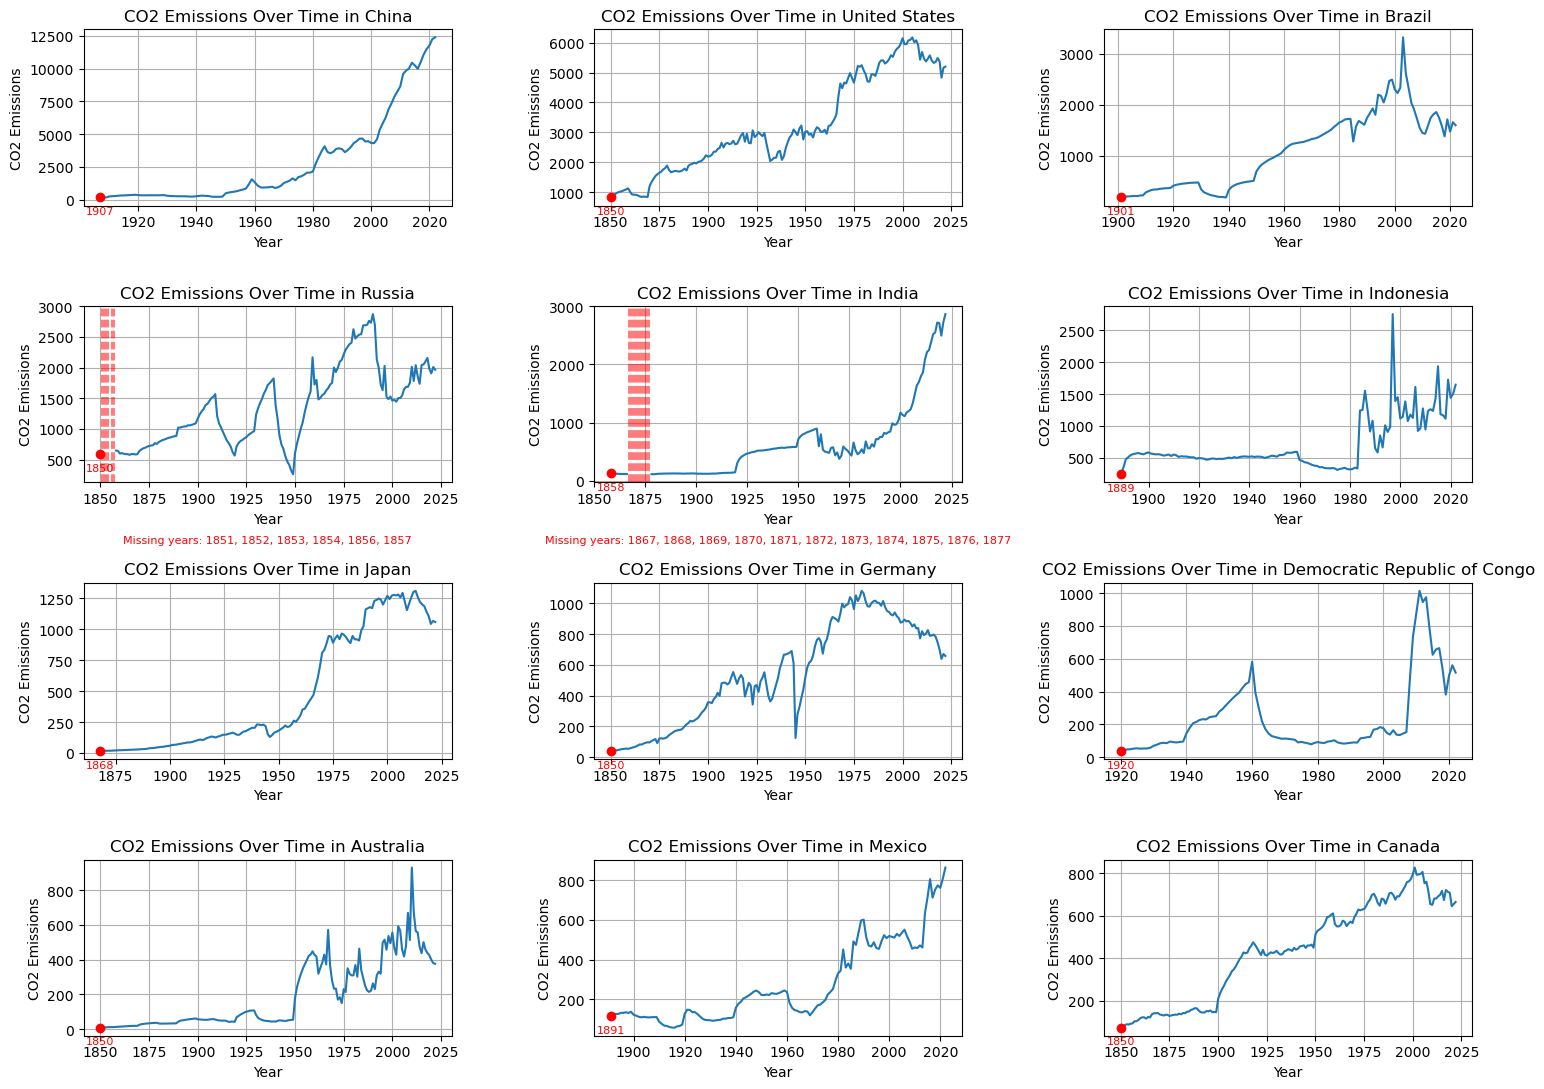

In [4]:
top_countries = df.groupby('country')['co2_including_luc'].max().nlargest(12).index

num_countries = len(top_countries)
num_cols = 3  # Number of columns for the subplot grid
num_rows = (num_countries - 1) // num_cols + 1  # Calculate the number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 11), squeeze=False)


for i, country in enumerate(top_countries):
    country_df = df[df['country'] == country]
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]

    first_year_nonzero_co2 = country_df.loc[country_df['co2_including_luc'] > 0, 'year'].min()
    missing_years = country_df[country_df['co2_including_luc'].isnull() & (country_df['year'] > first_year_nonzero_co2)]['year']

    ax.plot(country_df['year'], country_df['co2_including_luc'])
    ax.set_title(f'CO2 Emissions Over Time in {country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 Emissions')
    ax.grid(True)

    # Plotting missing years as vertical lines
    for year in missing_years:
        ax.axvline(x=year, color='r', linestyle='--', alpha=0.5)  # Vertical lines for missing years
    
    # Adding text annotation for missing years
    if not missing_years.empty:
        missing_text = f"Missing years: {', '.join(map(str, missing_years))}"
        ax.text(0.5, -0.3, missing_text, ha='center', va='top', fontsize=8, color='red', transform=ax.transAxes)

    # Adding a marker for the first year with non-zero CO2
    if not pd.isna(first_year_nonzero_co2):
        ax.scatter([first_year_nonzero_co2], [country_df.loc[country_df['year'] == first_year_nonzero_co2, 'co2_including_luc'].iloc[0]], color='red', zorder=5)
        ax.annotate(first_year_nonzero_co2, xy=(first_year_nonzero_co2, country_df.loc[country_df['year'] == first_year_nonzero_co2, 'co2_including_luc'].iloc[0]), xytext=(0, -12), 
                    textcoords='offset points', ha='center', fontsize=8, color='red')

plt.tight_layout()
plt.show()

In [18]:
top_countries = df.groupby('country')['co2_including_luc'].max().nlargest(12).index
top_countries_df = df[(df['country'].isin(top_countries))  & (df['year'] >= 1950)].reset_index(drop=True)
top_countries_df

,country,year,iso_code,population,gdp,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,cumulative_co2_including_luc,co2_including_luc
0,Australia,1950,AUS,8177169.0,9.767859e+10,NaN,0.632,44.071,NaN,0.000,0.000,124.505,11.035,NaN,NaN,4718.525,180.243
1,Australia,1951,AUS,8419836.0,1.018378e+11,NaN,0.611,46.097,NaN,0.000,0.000,181.224,14.414,NaN,NaN,4960.872,242.346
2,Australia,1952,AUS,8632790.0,1.027649e+11,NaN,0.672,47.027,NaN,0.000,0.000,220.445,14.747,NaN,NaN,5243.763,282.892
3,Australia,1953,AUS,8819163.0,1.059673e+11,NaN,0.789,48.232,NaN,0.000,0.000,255.023,14.015,NaN,NaN,5561.822,318.059
4,Australia,1954,AUS,9003364.0,1.125660e+11,NaN,0.945,51.135,NaN,0.000,0.000,280.334,15.863,NaN,NaN,5910.099,348.276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,United States,2018,USA,332140032.0,1.812469e+13,26768.986,38.971,1256.631,5798.152,72.066,1619.275,108.298,2366.168,24.686,420.355,534230.875,5486.095
872,United States,2019,USA,334319680.0,1.854055e+13,26578.494,40.896,1071.666,5685.684,88.437,1675.471,112.161,2360.999,24.677,423.539,539605.125,5374.306
873,United States,2020,USA,335942016.0,1.802736e+13,24622.646,40.688,877.920,5186.558,67.749,1656.255,114.729,2047.544,24.472,471.929,544434.500,4829.357
874,United States,2021,USA,336997632.0,1.909938e+13,25956.828,41.312,1004.531,5572.173,63.294,1659.225,127.596,2239.014,24.837,539.960,549594.312,5159.809


In [19]:
#% for all cols
top_countries_df.isna().sum()/top_countries_df.shape[0]*100

country                          0.000000
year                             0.000000
iso_code                         0.000000
population                       0.000000
gdp                              0.000000
primary_energy_consumption      24.657534
cement_co2                       0.000000
coal_co2                         0.000000
consumption_co2                 59.817352
flaring_co2                      0.000000
gas_co2                          0.000000
land_use_change_co2              0.000000
oil_co2                          0.000000
other_industry_co2              61.872146
trade_co2                       59.817352
cumulative_co2_including_luc     0.000000
co2_including_luc                0.000000
dtype: float64

In [20]:
top_countries_df = top_countries_df.drop(columns={'iso_code', 'primary_energy_consumption', 'consumption_co2', 'other_industry_co2', 'trade_co2'})

In [21]:
#% for all cols
top_countries_df.isna().sum()/top_countries_df.shape[0]*100

country                         0.0
year                            0.0
population                      0.0
gdp                             0.0
cement_co2                      0.0
coal_co2                        0.0
flaring_co2                     0.0
gas_co2                         0.0
land_use_change_co2             0.0
oil_co2                         0.0
cumulative_co2_including_luc    0.0
co2_including_luc               0.0
dtype: float64

In [22]:
top_countries_df = top_countries_df.reindex(columns=['year', 'country', 'population', 'gdp', 'cement_co2', 
                                                     'coal_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2', 'cumulative_co2_including_luc', 'co2_including_luc'])
top_countries_df

,year,country,population,gdp,cement_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,cumulative_co2_including_luc,co2_including_luc
0,1950,Australia,8177169.0,9.767859e+10,0.632,44.071,0.000,0.000,124.505,11.035,4718.525,180.243
1,1951,Australia,8419836.0,1.018378e+11,0.611,46.097,0.000,0.000,181.224,14.414,4960.872,242.346
2,1952,Australia,8632790.0,1.027649e+11,0.672,47.027,0.000,0.000,220.445,14.747,5243.763,282.892
3,1953,Australia,8819163.0,1.059673e+11,0.789,48.232,0.000,0.000,255.023,14.015,5561.822,318.059
4,1954,Australia,9003364.0,1.125660e+11,0.945,51.135,0.000,0.000,280.334,15.863,5910.099,348.276
...,...,...,...,...,...,...,...,...,...,...,...,...
871,2018,United States,332140032.0,1.812469e+13,38.971,1256.631,72.066,1619.275,108.298,2366.168,534230.875,5486.095
872,2019,United States,334319680.0,1.854055e+13,40.896,1071.666,88.437,1675.471,112.161,2360.999,539605.125,5374.306
873,2020,United States,335942016.0,1.802736e+13,40.688,877.920,67.749,1656.255,114.729,2047.544,544434.500,4829.357
874,2021,United States,336997632.0,1.909938e+13,41.312,1004.531,63.294,1659.225,127.596,2239.014,549594.312,5159.809


In [23]:
top_countries_df.to_csv('../output/data_cleaning/2_temp_cleaned_data_first_model.csv', index=False)